In [145]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as datetime
%matplotlib inline
import matplotlib.pyplot as plt


import re  # regex

from bs4 import BeautifulSoup

import nltk
import nltk.corpus
from nltk.corpus import stopwords

#nltk.download()

from nltk.tokenize import word_tokenize
#from nltk import word_tokenize
nltk.download('punkt')

import string
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet

from wordcloud import WordCloud, STOPWORDS
import collections

from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download("vader_lexicon")
plt.style.use('default')
import squarify

import plotly.express as px


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\godwi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\godwi\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# dler = nltk.downloader.Downloader()
# dler._update_index()
# dler.download('all')

In [3]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [4]:
name = pd.read_csv("../web_scrap_database/candidate.csv")
name.shape

(75005, 7)

In [5]:
name.drop_duplicates(subset = 'Tweet', keep = 'first', inplace = True)

In [6]:
pd.set_option('display.max_columns', None)

In [7]:
name['Date Created'] = pd.to_datetime(name['Date Created'])

In [8]:
name['year'] = pd.DatetimeIndex(name['Date Created']).year.astype('str')
name['month'] = pd.DatetimeIndex(name['Date Created']).month.astype('str')
name['day'] = pd.DatetimeIndex(name['Date Created']).day.astype('str')

name['date'] =  name['year'] + '-' + name['month'] + '-' + name['day']
name['date'] = pd.to_datetime(name['date'])
name = name.iloc[:,[0,1,2,4,5,6]]

In [9]:
name

,User,location,Date Created,Source of Tweet,Tweet,name
0,Shynomite1,"Kano, Nigeria",2022-08-25 23:59:32+00:00,Twitter Web App,@panther_wakanda @PeterObi The same Reno Mocke...,obi
1,UfuomaIdebe,NaN,2022-08-25 23:59:22+00:00,Twitter for Android,@The_real_Teelaw @oluremisonaiya @PeterObi You...,obi
2,norashimaarsad,NaN,2022-08-25 23:58:48+00:00,Twitter for iPhone,@gypsyprince09 @Emmadiebere @OfiabuluOsita @Vi...,obi
3,OnyinyeAdanna,NaN,2022-08-25 23:57:31+00:00,Twitter for Android,@renoomokri @PeterObi With all due respect sir...,obi
4,SwtNkechi,"The Woodlands, TX",2022-08-25 23:56:22+00:00,Twitter for iPhone,@AGINAS @Germanprinz @PeterObi @GovernorIkpeaz...,obi
...,...,...,...,...,...,...
75000,ihe69,"Lagos, Nigeria",2022-08-23 09:42:40+00:00,Twitter for iPhone,@sosunwale @Mr_JAGs @YusufOlatunjiA_ @KashimSM...,Tinubu
75001,Kachigreat,NaN,2022-08-23 09:42:34+00:00,Twitter for Android,@FS_Yusuf_ @officialABAT Comrade vawulence htt...,Tinubu
75002,hey_why41,Abeokuta,2022-08-23 09:42:29+00:00,Twitter for Android,@flightEA2112 @uwandunnandi @Mr_JAGs @fkeyamo ...,Tinubu
75003,Jonatha36403769,NaN,2022-08-23 09:42:07+00:00,Twitter for Android,@Mr_JAGs @KashimSM @officialABAT @Sharksawn Th...,Tinubu


In [10]:
# date from may to date
name = name[name["Date Created"] >= '2022-05-01'].sort_values('Date Created')
name

,User,location,Date Created,Source of Tweet,Tweet,name
45002,Legbetiofficial,NaN,2022-08-10 08:27:14+00:00,Twitter for iPhone,let me just tell @inecnigeria and this present...,inec
45001,Axelkings47,Shrine,2022-08-10 08:27:30+00:00,Twitter for Android,@ItsOladeni @firstladyship @inecnigeria Oga th...,inec
45000,Badmanseed,"EKO, LAGOS AFRICA",2022-08-10 08:27:36+00:00,Twitter for Android,@inecnigeria Please and please you are an inde...,inec
44999,adelodunbadru,"Lagos, Nigeria",2022-08-10 08:27:51+00:00,Twitter for Android,@Adullam_Shalom @akunnachux @Dinokaysman @inec...,inec
44998,francis4tune,Nigeria,2022-08-10 08:28:26+00:00,Twitter for Android,@inecnigeria what is this? Are you colluding? ...,inec
...,...,...,...,...,...,...
45004,MillerJFNG,NaN,2022-08-25 23:58:58+00:00,Twitter for iPhone,@renoomokri Judas dined with the Lord and lat...,reno
1,UfuomaIdebe,NaN,2022-08-25 23:59:22+00:00,Twitter for Android,@The_real_Teelaw @oluremisonaiya @PeterObi You...,obi
60004,Adermsy0324,"Yola, Nigeria",2022-08-25 23:59:32+00:00,Twitter for Android,@KashimmediaS @Babakuramadu #TinibuPeoplesNetw...,Tinubu
0,Shynomite1,"Kano, Nigeria",2022-08-25 23:59:32+00:00,Twitter Web App,@panther_wakanda @PeterObi The same Reno Mocke...,obi


In [11]:
# # #cleaning the tweets  tHIS ONE REMOVES or strips THE dupliate twitter hash tags e.g @ john @ timi, retains emorji , but makes space \n

# def remove_pattern(input_txt, pattern):
#     r = re.findall(pattern, input_txt)
#     for i in r:
#         input_txt = re.sub(i, '', input_txt)        
#     return input_txt
# def clean_tweets(tweets):
#     #remove twitter Return handles (RT @xxx:)
#     tweets = np.vectorize(remove_pattern)(tweets, "RT @[\w]*:") 
    
#     #remove twitter handles (@xxx)
#     tweets = np.vectorize(remove_pattern)(tweets, "@[\w]*")
    
#     #remove URL links (httpxxx)
#     tweets = np.vectorize(remove_pattern)(tweets, "https?://[A-Za-z0-9./]*")
    
#     #remove special characters, numbers, punctuations (except for #)
#     tweets = np.core.defchararray.replace(tweets, "[^a-zA-Z]", " ")
    
#     #remove new line
#     tweets = np.vectorize(remove_pattern)(tweets, "https?://[A-Za-z0-9./]*")
    
#     return tweets


# df['Tweet'] = df.Tweet.apply(lambda x :clean_tweets(x) )
# df

In [12]:
# stopword remover and preprocessing  channges emorji to lol also strip multiple hash tags

# stopwords = set(stopwords.words("english"))
# def clean_tweet(tweet):
#     if type(tweet) == np.float:
#         return ""
#     temp = tweet.lower()
#     temp = re.sub("'", "", temp) # to avoid removing contractions in english
#     temp = re.sub("@[A-Za-z0-9_]+","", temp)
#     temp = re.sub("#[A-Za-z0-9_]+","", temp)
#     temp = re.sub(r'http\S+', '', temp)
#     temp = re.sub('[()!?]', ' ', temp)
#     temp = re.sub('\[.*?\]',' ', temp)
#     temp = re.sub("[^a-z0-9]"," ", temp)
#     temp = temp.split()
#     temp = [w for w in temp if not w in stopwords]
#     temp = " ".join(word for word in temp)
#     return temp
# name['tweet_preprocessed'] = name.Tweet.apply(lambda x :clean_tweet(x) )

C:\Users\godwi\AppData\Local\Temp\ipykernel_17632\1938295927.py:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if type(tweet) == np.float:


In [146]:
# removes only @ from hash tags and converts emoji to lol

def clean_lemmatize_token(tweet):
    stop_words = set(stopwords.words('english'))
    
    cleaned = tweet.translate(str.maketrans('', '', string.punctuation)).lower()
    tokenized = word_tokenize(cleaned)
    filtered = [w for w in tokenized if not w in stop_words]
    lemmatizer = WordNetLemmatizer()
    lemmatized = []
    for word in filtered:
        lemmatized.append(lemmatizer.lemmatize(word))
    to_remove = ['rt','mention','sxsw','link',"RT @[\w]*:"]
    lemmatized = [w for w in lemmatized if w not in to_remove]
    lemmatized = ' '.join(lemmatized)
    return lemmatized

name['tweet_preprocessed'] = name.Tweet.apply(lambda x :clean_lemmatize_token(x) )



In [14]:
#Use with TFIDF 

# from nltk.tokenize import WordPunctTokenizer
# tok = WordPunctTokenizer()
# # pat1 = r'@[A-Za-z0-9]+'
# # pat2 = r'https?://[A-Za-z0-9./]+'
# # combined_pat = r'|'.join((pat1, pat2))

# def tweet_cleaner(text):
#     # soup = BeautifulSoup(text, 'lxml')
#     # souped = soup.get_text()
#     # stripped = re.sub(combined_pat, '', souped)
#     # try:
#     #     clean = stripped.decode("utf-8-sig").replace(u"\ufffd", "?")
#     # except:
#     #     clean = stripped
#     # letters_only = re.sub("[^a-zA-Z]", " ", clean)
#     # lower_case = letters_only.lower()
#     # During the letters_only process two lines above, it has created unnecessay white spaces,
#     # I will tokenize and join together to remove unneccessary white spaces
#     words = tok.tokenize(lower_case)
#     return (" ".join(words)).strip()

In [15]:
#Use with TFIDF 
# # Tokenization
# tk = word_tokenize
# df['Tweet'].apply(tk)

In [16]:
#Use with TFIDF 
# stop_words = set(stopwords.words('english'))

# def cleaning_stopwords(text):
#     return " ".join([word for word in str(text).split() if word not in stop_words])

# df['tweet_stopword'] = df['Tweet'].apply(lambda x:cleaning_stopwords(x) )
# df.head()

In [148]:
name1 =name.iloc[:,[4,5,6]]
name1

,Tweet,name,tweet_preprocessed
45002,let me just tell @inecnigeria and this present...,inec,let tell inecnigeria present government osun s...
45001,@ItsOladeni @firstladyship @inecnigeria Oga th...,inec,itsoladeni firstladyship inecnigeria oga pvc p...
45000,@inecnigeria Please and please you are an inde...,inec,inecnigeria please please independent body hen...
44999,@Adullam_Shalom @akunnachux @Dinokaysman @inec...,inec,adullamshalom akunnachux dinokaysman inecniger...
44998,@inecnigeria what is this? Are you colluding? ...,inec,inecnigeria colluding 4 video buried damaged p...
...,...,...,...
45004,@renoomokri Judas dined with the Lord and lat...,reno,renoomokri juda dined lord later betrayed him…...
1,@The_real_Teelaw @oluremisonaiya @PeterObi You...,obi,therealteelaw oluremisonaiya peterobi serious 🤣
60004,@KashimmediaS @Babakuramadu #TinibuPeoplesNetw...,Tinubu,kashimmedias babakuramadu tinibupeoplesnetwork...
0,@panther_wakanda @PeterObi The same Reno Mocke...,obi,pantherwakanda peterobi reno mockery🤣🤣


# VADER FOR SENTIMENT

In [149]:
sentiments = SentimentIntensityAnalyzer()
name['Positive'] = name['Tweet'].apply(lambda x: sentiments.polarity_scores(x)['pos'])
name['Negetive'] = name['Tweet'].apply(lambda x: sentiments.polarity_scores(x)['neu'])
name['Neutral'] = name['Tweet'].apply(lambda x: sentiments.polarity_scores(x)['neg'])
name['compound'] = name['Tweet'].apply(lambda x: sentiments.polarity_scores(x)['compound'])

In [150]:
score = name.compound.values
sentiment = []
for i in score:
    if i >=0.05 :
        sentiment.append('positive')
    elif i <= -0.05:
        sentiment.append('negative')
    else:
        sentiment.append('neutral')

In [151]:
name['sentiment']= sentiment

In [152]:
name['sentiment'] = sentiment
tweet_final = name.loc[:,['tweet_preprocessed','sentiment']]
tweet_final

,tweet_preprocessed,sentiment
45002,let tell inecnigeria present government osun s...,positive
45001,itsoladeni firstladyship inecnigeria oga pvc p...,neutral
45000,inecnigeria please please independent body hen...,positive
44999,adullamshalom akunnachux dinokaysman inecniger...,neutral
44998,inecnigeria colluding 4 video buried damaged p...,negative
...,...,...
45004,renoomokri juda dined lord later betrayed him…...,negative
1,therealteelaw oluremisonaiya peterobi serious 🤣,positive
60004,kashimmedias babakuramadu tinibupeoplesnetwork...,neutral
0,pantherwakanda peterobi reno mockery🤣🤣,neutral


In [153]:
tweet_final.sentiment.value_counts().to_frame()

,sentiment
positive,27718
neutral,24464
negative,19366


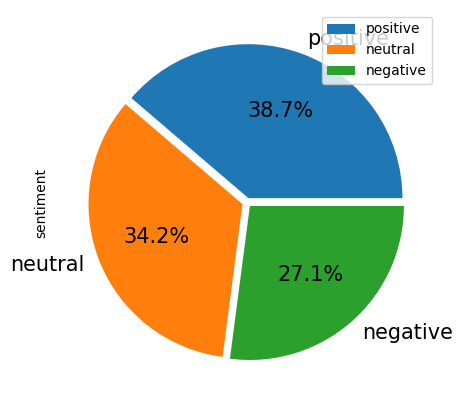

In [154]:
fig,ax = plt.subplots(figsize = (10,5))
tweet_final.sentiment.value_counts().plot(kind = 'pie',autopct='%1.1f%%',explode=[0.03,0.03,0.03],textprops={'fontsize': 15})
ax.legend()

In [155]:
tweet_final.sentiment.value_counts().to_frame()

,sentiment
positive,27718
neutral,24464
negative,19366


<AxesSubplot:ylabel='sentiment'>

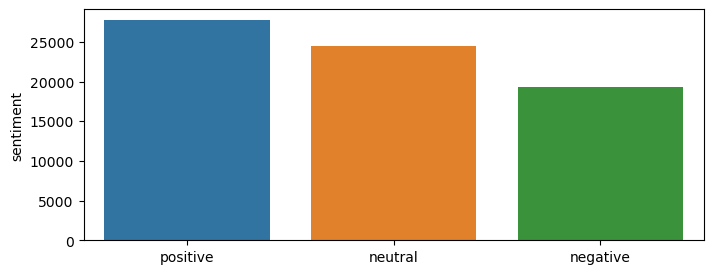

In [156]:
fig,ax = plt.subplots(figsize = (8,3))
sns.barplot(data = tweet_final.sentiment.value_counts().to_frame(), y = tweet_final.sentiment.value_counts().to_frame().sentiment,\
    x =tweet_final.sentiment.value_counts().to_frame().index)

In [157]:
tweet_final['sentiment_encoded'] = tweet_final.sentiment.apply(lambda x: 1 if x == 'positive' else -1 if x == 'negative' else 0)

In [158]:
tweet_final.loc[:, ["tweet_preprocessed", "sentiment"]][tweet_final.loc[:, ["tweet_preprocessed", "sentiment"]].sentiment =='negative']['tweet_preprocessed']

44998    inecnigeria colluding 4 video buried damaged p...
44977    inecnigeria inec bin honest personally ive nev...
44974    ashashakano supertee971 rainzofficial2 inecnig...
44966    inecnigeria well watching closely sign 2019 el...
44965    high time privatize dis inecnigeria sef dy one...
                               ...                        
45008    francis103799 renoomokri see obj standing midd...
45006    uironuru renoomokri opinion people may cajoled...
2        gypsyprince09 emmadiebere ofiabuluosita victor...
45004    renoomokri juda dined lord later betrayed him…...
45003    solucoconuthead joegenerian renoomokri omo pol...
Name: tweet_preprocessed, Length: 19366, dtype: object

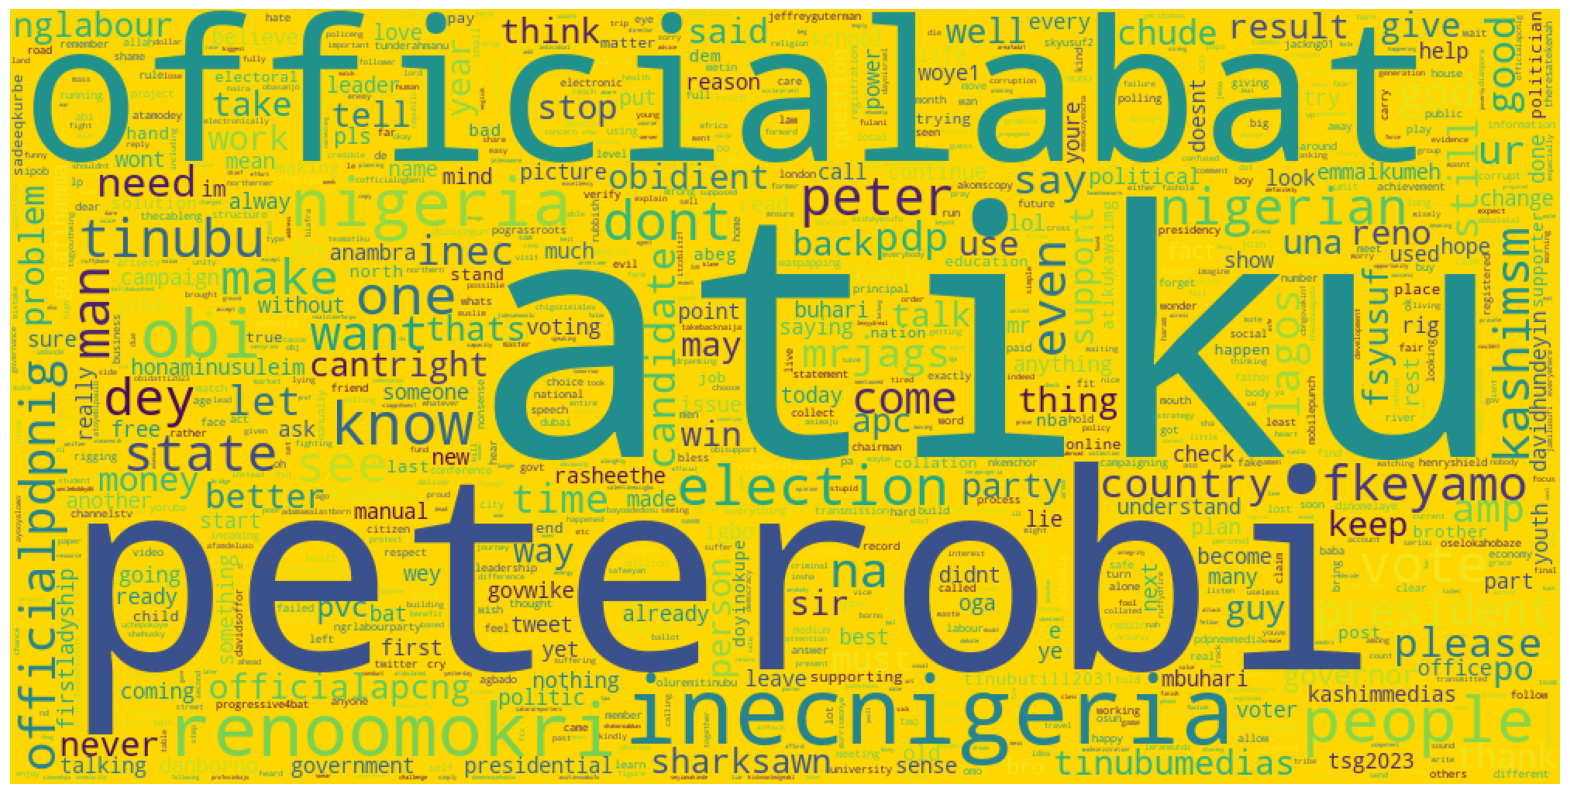

In [234]:
import collections

stopwords = STOPWORDS
stopwords.update(["https", "co","I","The","s","u","go","us"])


# text = "".join(tweet_final.loc[:, ["tweet_preprocessed", "sentiment"]][tweet_final.loc[:, \
#     ["tweet_preprocessed", "sentiment"]].sentiment =='positive']['tweet_preprocessed'])


text = "".join(tweet_final.tweet_preprocessed)
fig, ax = plt.subplots(figsize = (20,20))
wc = WordCloud(stopwords=stopwords,max_words = 5000 , width = 1000 , \
    background_color='gold',height = 500, collocations=False).generate(text)
plt.axis("off")
ax.imshow(wc);

In [194]:
filtered_words = [word for word in text.split() if word not in stopwords]
counted_words = collections.Counter(filtered_words)

words = []
counts = []
for letter, count in counted_words.most_common(10):
    words.append(letter)
    counts.append(count)

In [210]:
popular = pd.DataFrame(counted_words, index =[0]).T.reset_index().rename({"index":"word"},axis =1)\
    .rename({0 :"count"},axis =1).groupby("word").sum().sort_values("count",ascending= False)[:10]

In [233]:
popular

,count
word,
atiku,16762
peterobi,14608
officialabat,14428
inecnigeria,11828
’,6603
renoomokri,6025
obi,5939
nigeria,5598
people,5004


In [230]:
new_count = []
for n in popular.index:
    for i in popular.values:
        if n == "peterobi" :
            new_count.append(i)

In [232]:
new_count

[array([16762], dtype=int64),
 array([14608], dtype=int64),
 array([14428], dtype=int64),
 array([11828], dtype=int64),
 array([6603], dtype=int64),
 array([6025], dtype=int64),
 array([5939], dtype=int64),
 array([5598], dtype=int64),
 array([5004], dtype=int64),
 array([4262], dtype=int64)]

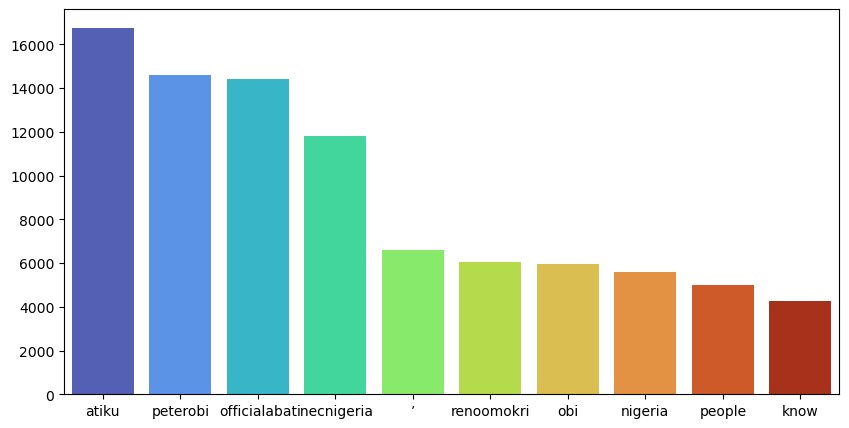

In [196]:
fig,ax =plt.subplots(figsize = (10,5))
sns.barplot(x = words, y = counts, palette= 'turbo')
plt.show()

<AxesSubplot:ylabel='Source of Tweet'>

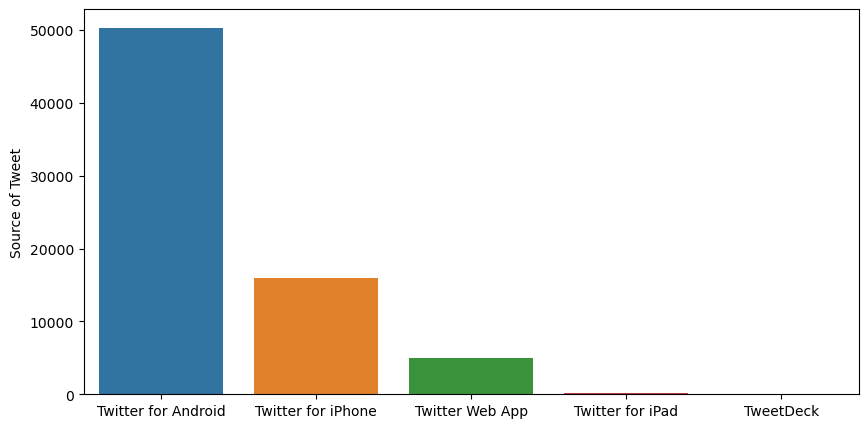

In [164]:
tweet_platform = name['Source of Tweet'].value_counts().head(5).to_frame()
fig,ax =plt.subplots(figsize = (10,5))
sns.barplot( data = tweet_platform,  x = tweet_platform.index,  y = tweet_platform["Source of Tweet"])

In [165]:
tweet_platform

,Source of Tweet
Twitter for Android,50337
Twitter for iPhone,15982
Twitter Web App,4966
Twitter for iPad,191
TweetDeck,24


In [188]:
name_sentiment = name.iloc[:,[1,2,3,5,6,11]]
obi = (name_sentiment[(name_sentiment.tweet_preprocessed.str.contains("peterobi")) & (name_sentiment.sentiment =="positive")])
atiku = len (name_sentiment[(name_sentiment.tweet_preprocessed.str.contains("atiku")) & (name_sentiment.sentiment =="positive")])
tinubu = len (name_sentiment[(name_sentiment.tweet_preprocessed.str.contains("tinubu")) & (name_sentiment.sentiment =="positive")])
reno = len (name_sentiment[(name_sentiment.tweet_preprocessed.str.contains("reno")) & (name_sentiment.sentiment =="positive")])
inec =len (name_sentiment[(name_sentiment.tweet_preprocessed.str.contains("inec")) & (name_sentiment.sentiment =="positive")])


In [189]:
obi.shape

(7815, 6)

# Perform cluster of variuos twitter users

In [168]:
from sklearn.feature_extraction.text import TfidfVectorizer
name_vec = name.iloc[:, [6,11]]
name_vec

,tweet_preprocessed,sentiment
45002,let tell inecnigeria present government osun s...,positive
45001,itsoladeni firstladyship inecnigeria oga pvc p...,neutral
45000,inecnigeria please please independent body hen...,positive
44999,adullamshalom akunnachux dinokaysman inecniger...,neutral
44998,inecnigeria colluding 4 video buried damaged p...,negative
...,...,...
45004,renoomokri juda dined lord later betrayed him…...,negative
1,therealteelaw oluremisonaiya peterobi serious 🤣,positive
60004,kashimmedias babakuramadu tinibupeoplesnetwork...,neutral
0,pantherwakanda peterobi reno mockery🤣🤣,neutral


In [169]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [239]:
name_vec['sentiment_encode'] = name_vec['sentiment'].apply(lambda x: -1 if x == 'negative' else 0 if x == 'neutral' else 1 )

C:\Users\godwi\AppData\Local\Temp\ipykernel_17632\3731929696.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  name_vec['sentiment_encode'] = name_vec['sentiment'].apply(lambda x: -1 if x == 'negative' else 0 if x == 'neutral' else 1 )


In [242]:
name_vec

,tweet_preprocessed,sentiment,sentiment_encode
45002,let tell inecnigeria present government osun s...,positive,1
45001,itsoladeni firstladyship inecnigeria oga pvc p...,neutral,0
45000,inecnigeria please please independent body hen...,positive,1
44999,adullamshalom akunnachux dinokaysman inecniger...,neutral,0
44998,inecnigeria colluding 4 video buried damaged p...,negative,-1
...,...,...,...
45004,renoomokri juda dined lord later betrayed him…...,negative,-1
1,therealteelaw oluremisonaiya peterobi serious 🤣,positive,1
60004,kashimmedias babakuramadu tinibupeoplesnetwork...,neutral,0
0,pantherwakanda peterobi reno mockery🤣🤣,neutral,0


In [244]:
vectorizer = TfidfVectorizer(use_idf=True,stop_words='english')
X = name_vec.tweet_preprocessed
y = name_vec.sentiment_encode

In [245]:
X = vectorizer.fit_transform(X)

In [246]:
from sklearn.model_selection import train_test_split

In [247]:
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [248]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix, f1_score
from sklearn.model_selection import cross_val_score

In [267]:
# from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier

# clf = RandomForestClassifier(random_state=42, n_estimators=50)
lr = LogisticRegression(max_iter=3500, random_state=42)
kn = KNeighborsClassifier(n_neighbors=5)
sgd = SGDClassifier(random_state=42)


models = { "LogisticRegression" : lr,
         "KNeighborsClassifier": kn,
         "SGDClassifier": sgd
         }

for model in models.keys():
    scores = cross_val_score(models[model], X, y, cv=5)
    
    print('model:' ,model)
    print('score:', scores)
    print('mean:' ,scores.mean())
    models[model].fit(X_train, y_train)
    print("accuracy_score:", (models[model].score(X_test, y_test)))
    print("training score:", (models[model].score(X_train, y_train)))
    print()
    # models[model].fit(X,y)
    # print(f'accuracy = )
    
# # Dictionary of model
# lr.fit(X_train,y_train)
# kn.fit(X_train,y_train)
# sgd.fit(X_train, y_train)

model: LogisticRegression
score: [0.77554158 0.78595388 0.79378057 0.81438256 0.80445873]
mean: 0.7948234638894297


# Hypertuning 

In [178]:
from sklearn.model_selection import GridSearchCV
# defining parameter range 
param_grid = {"solver": ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
              "C" :[100, 20, 10, 1.0, 0.1, 0.01],
              "penalty" :['l2']
              }  
   
grid = GridSearchCV(lr, param_grid, refit = True, verbose = 3,n_jobs=-1,cv=5) 
   
# fitting the model for grid search 
grid.fit(X_train, y_train) 
 
# print best parameter after tuning 
print(grid.best_params_) 
grid_predictions = grid.predict(X_test) 


Fitting 3 folds for each of 30 candidates, totalling 90 fits
{'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}


In [179]:
confusion_matrix(y_test, grid_predictions)

array([[2682,  573,  630],
       [ 228, 4325,  284],
       [ 503,  521, 4564]], dtype=int64)

In [180]:
y_pred = lr.predict(X_test)
y_pred_probab = grid.predict_proba(X_test)

In [181]:
accuracy_score(y_test, grid_predictions)

0.8085953878406709

In [182]:
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

    negative       0.79      0.69      0.73      3885
     neutral       0.80      0.89      0.84      4837
    positive       0.83      0.82      0.82      5588

    accuracy                           0.81     14310
   macro avg       0.81      0.80      0.80     14310
weighted avg       0.81      0.81      0.81     14310



In [183]:
cm  = confusion_matrix(y_test, grid_predictions)
cm = pd.DataFrame(cm)
cm

,0,1,2
0,2682,573,630
1,228,4325,284
2,503,521,4564


<AxesSubplot:>

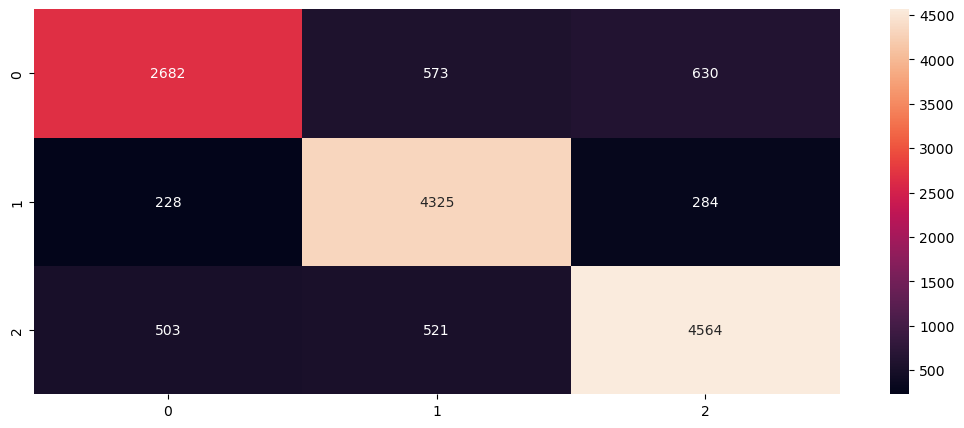

In [184]:
plt.subplots(figsize = (13,5))
sns.heatmap(cm, annot=True,fmt='g')

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

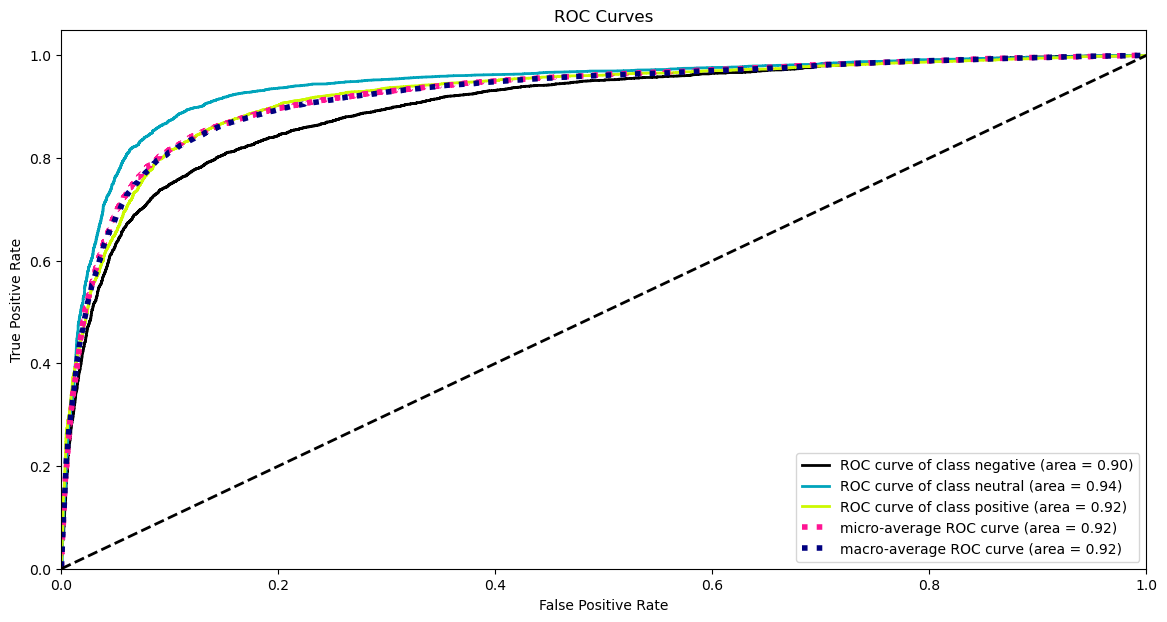

In [185]:
import scikitplot as skplt
fig, ax = plt.subplots(figsize=(14,7))
skplt.metrics.plot_roc(y_test, y_pred_probab,ax= ax)